In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-10-28 20:32:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-10-28 20:32:12 (282 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [107]:
vocab_size = 1000 # YOUR CODE HERE
embedding_dim = 16 # YOUR CODE HERE
max_length = 120 # YOUR CODE HERE
trunc_type = 'post' # YOUR CODE HERE
padding_type = 'post' # YOUR CODE HERE
oov_tok = "<OOV>" # YOUR CODE HERE
training_portion = .8

In [119]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [120]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [121]:
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE

train_sentences = sentences[0:train_size] # YOUR CODE HERE
train_labels = labels[0:train_size] # YOUR CODE HERE

validation_sentences = sentences[train_size:]# YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [122]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE)
word_index = tokenizer.word_index # YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type) #, truncating=trunc_type) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))
print(train_padded[1])
# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120
[  1   6   1   1 364 188   6   1  26   1   1   1   1   6   1   1  25   1
   1   6   1 774   1   1   1   1   1 129   1 126 321   1   1   1 860   1
 498   1   6   1 774 766   4   1 255 557   1 378   1   2   1 270 694   6
   1 149 736 334   1   1 573   1   1   1   1   1   1   6   1   1   1   1
   1   1   1 653   1   1 577   1   1   2 363   1  87 529 819   1   1   1
 625  75   1   1   1 268   1 241  37 791 268 401   6   1 557 102  14  18
 125 211   1 129   1   1   1   1   1   1   1   1]


In [123]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type) #, truncating=trunc_type) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [125]:
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(train_labels) # YOUR CODE HERE)

train_label_seq = label_tokenizer.texts_to_sequences(train_labels) # YOUR CODE HERE
validation_label_seq = label_tokenizer.texts_to_sequences(validation_labels) # YOUR CODE HERE

train_label_seq = np.array(train_label_seq)
validation_label_seq = np.array(validation_label_seq)

print(label_tokenizer.index_word)
print(train_label_seq[0])
print(train_label_seq[1])
print(train_label_seq[2])
print(train_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

{1: 'sport', 2: 'business', 3: 'politics', 4: 'entertainment', 5: 'tech'}
[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [126]:
model = tf.keras.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_11  (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [127]:

print(train_padded[2])
print(train_label_seq[2])
print(validation_padded[2])
print(validation_label_seq[2])

num_epochs = 30
history = model.fit(train_padded, 
                    train_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), 
                    verbose=2) # YOUR CODE HERE)

[926   1   1   1   1   1 618 871  63  48 226  59  42 607   1 573 303   1
  29  43 199   1 747  63 219   1 908   1   5 439   1 909   1  44  59  44
 141 141   1   1   1   1 363   1   1  93 430 379 102 163  39 125   1   1
 918 414 380 434 426   1   1   1   1   1 160 485 249  33 160 373 426   1
 626 201  56 247   1 439   1 105 578  26 861 496 426 618 516   3   1  66
  74   1   1 619  35 949  13  26  82 434 496   1 446   1   1 253  13 835
   1 182   1   4   1 242   1   1   1   1  30   1]
[1]
[406 721 784   1   1 312 115  89 253   1  89   1   1   1   1   1   1  81
 784   3 576   1  55   1 177 388   1   3   1  58  38   1 316 636   1   1
   1  63  55 217   2   1   1   1   1   1 146   6 187   3 131  44   1 346
  20   2   1   1 406 309   1 146   1 131   2   1   1   1 389 556   1   1
 156   6   1   1   1 131   2   1   1 721   1   1  37   1   1   1  37   1
 180 157  91 643 527 123 413   3   1   1 314 647 793   1   1   1   1   1
   1 464   3   6 187   2 738 598  25   1   1  22]
[3]
Epoch 1/30
56/56

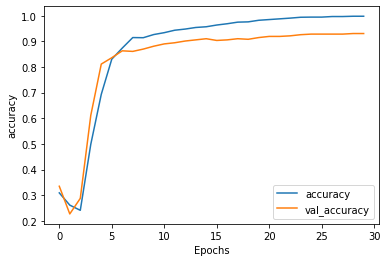

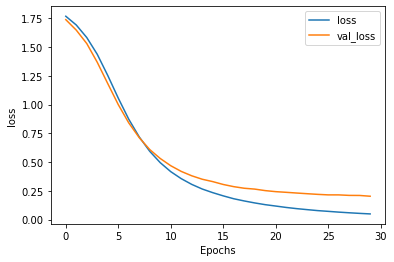

In [129]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [130]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [131]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [132]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [133]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>